In [31]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/Colab Notebooks/x.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:


import sklearn
import pandas as pd


In [33]:
df.head()

,Unnamed: 0,userid,latitude,longitude,spotid,ts,date,time,weekday,day,hour,spotname_x,spotname_y
0,0,0,40.643885,-73.782806,23261,2010-10-11 20:21:28-04:00,2010-10-11,20:21:28,0,11,20,JFK John F. Kennedy International,JFK John F. Kennedy International
1,1,0,40.643885,-73.782806,23261,2010-10-07 11:27:40-04:00,2010-10-07,11:27:40,3,7,11,JFK John F. Kennedy International,JFK John F. Kennedy International
2,2,5,40.643885,-73.782806,23261,2010-08-15 23:47:20-04:00,2010-08-15,23:47:20,6,15,23,JFK John F. Kennedy International,JFK John F. Kennedy International
3,3,8,40.643885,-73.782806,23261,2010-10-06 16:23:14-04:00,2010-10-06,16:23:14,2,6,16,JFK John F. Kennedy International,JFK John F. Kennedy International
4,4,15,40.643885,-73.782806,23261,2010-10-13 00:10:36-04:00,2010-10-13,00:10:36,2,13,0,JFK John F. Kennedy International,JFK John F. Kennedy International


In [34]:
len(df['spotname_x'])

112390

In [35]:
df.drop('Unnamed: 0',axis=1)

,userid,latitude,longitude,spotid,ts,date,time,weekday,day,hour,spotname_x,spotname_y
0,0,40.643885,-73.782806,23261,2010-10-11 20:21:28-04:00,2010-10-11,20:21:28,0,11,20,JFK John F. Kennedy International,JFK John F. Kennedy International
1,0,40.643885,-73.782806,23261,2010-10-07 11:27:40-04:00,2010-10-07,11:27:40,3,7,11,JFK John F. Kennedy International,JFK John F. Kennedy International
2,5,40.643885,-73.782806,23261,2010-08-15 23:47:20-04:00,2010-08-15,23:47:20,6,15,23,JFK John F. Kennedy International,JFK John F. Kennedy International
3,8,40.643885,-73.782806,23261,2010-10-06 16:23:14-04:00,2010-10-06,16:23:14,2,6,16,JFK John F. Kennedy International,JFK John F. Kennedy International
4,15,40.643885,-73.782806,23261,2010-10-13 00:10:36-04:00,2010-10-13,00:10:36,2,13,0,JFK John F. Kennedy International,JFK John F. Kennedy International
...,...,...,...,...,...,...,...,...,...,...,...,...
112385,194967,40.823098,-74.219366,865373,2010-08-03 20:26:18-04:00,2010-08-03,20:26:18,1,3,20,Quik Check,Quik Check
112386,195787,40.737428,-74.004173,1042049,2010-05-18 22:52:14-04:00,2010-05-18,22:52:14,1,18,22,Coopy's Den,Coopy's Den
112387,195787,40.737428,-74.004173,1042049,2010-04-30 20:34:10-04:00,2010-04-30,20:34:10,4,30,20,Coopy's Den,Coopy's Den
112388,195789,40.726720,-73.986155,16965,2010-10-20 20:04:03-04:00,2010-10-20,20:04:03,2,20,20,Counter,Counter


In [36]:
new_df = df[['latitude','longitude']]
df1 = df[['spotid']]

In [37]:
new_df.head()

,latitude,longitude
0,40.643885,-73.782806
1,40.643885,-73.782806
2,40.643885,-73.782806
3,40.643885,-73.782806
4,40.643885,-73.782806


In [38]:
from sklearn.model_selection import train_test_split

trainx, testx,trainy, testy = train_test_split(df1,new_df, test_size=0.1, random_state=42)



In [39]:
from sklearn.linear_model import LinearRegression
llr = LinearRegression()
llr.fit(trainx, trainy)
llr.score(testx,testy)

0.0006221440688248814

In [40]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(trainx,trainy)

DecisionTreeRegressor()

In [41]:
lr.score(testx,testy)

0.8745831837290896

In [42]:
lr.predict([[23261]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([[ 40.64388454, -73.7828064 ]])

In [43]:
from sklearn.ensemble import RandomForestRegressor
kr = RandomForestRegressor()
kr.fit(trainx,trainy)
#kr.score(trainx,trainy)

RandomForestRegressor()

In [44]:
kr.score(testx,testy)

0.8790350191562006

In [45]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
kr.fit(trainx,trainy)
kr.score(testx,testy)

0.7874013460305626

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['spotname_x']= label_encoder.fit_transform(df['spotname_x'])

In [47]:
len(df.spotname_x.unique())

14459

In [48]:
df

,Unnamed: 0,userid,latitude,longitude,spotid,ts,date,time,weekday,day,hour,spotname_x,spotname_y
0,0,0,40.643885,-73.782806,23261,2010-10-11 20:21:28-04:00,2010-10-11,20:21:28,0,11,20,6301,JFK John F. Kennedy International
1,1,0,40.643885,-73.782806,23261,2010-10-07 11:27:40-04:00,2010-10-07,11:27:40,3,7,11,6301,JFK John F. Kennedy International
2,2,5,40.643885,-73.782806,23261,2010-08-15 23:47:20-04:00,2010-08-15,23:47:20,6,15,23,6301,JFK John F. Kennedy International
3,3,8,40.643885,-73.782806,23261,2010-10-06 16:23:14-04:00,2010-10-06,16:23:14,2,6,16,6301,JFK John F. Kennedy International
4,4,15,40.643885,-73.782806,23261,2010-10-13 00:10:36-04:00,2010-10-13,00:10:36,2,13,0,6301,JFK John F. Kennedy International
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112385,112385,194967,40.823098,-74.219366,865373,2010-08-03 20:26:18-04:00,2010-08-03,20:26:18,1,3,20,10296,Quik Check
112386,112386,195787,40.737428,-74.004173,1042049,2010-05-18 22:52:14-04:00,2010-05-18,22:52:14,1,18,22,3418,Coopy's Den
112387,112387,195787,40.737428,-74.004173,1042049,2010-04-30 20:34:10-04:00,2010-04-30,20:34:10,4,30,20,3418,Coopy's Den
112388,112388,195789,40.726720,-73.986155,16965,2010-10-20 20:04:03-04:00,2010-10-20,20:04:03,2,20,20,3473,Counter


In [49]:
df2 = df[['latitude','longitude']]
df3 = df1 = df[['spotid','spotname_x']]

In [50]:
from sklearn.model_selection import train_test_split

xtrain, xtest,ytrain, ytest = train_test_split(df1,new_df, test_size=0.1, random_state=42)


In [51]:
from sklearn.linear_model import LinearRegression
llr = LinearRegression()
llr.fit(xtrain, ytrain)
llr.score(xtest,ytest)

0.0007809125592141419

In [52]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8677691339995275

In [53]:
from sklearn.ensemble import RandomForestRegressor
kr = RandomForestRegressor()
kr.fit(xtrain,ytrain)
kr.score(xtest,ytest)

0.905480213948169

In [54]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
kr.fit(xtrain,ytrain)
kr.score(xtest,ytest)

0.7717606471614109

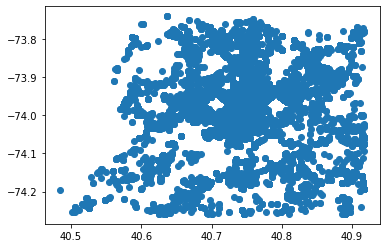

In [55]:
import matplotlib.pyplot as plt
plt.scatter(df.latitude, df.longitude)